<a href="https://colab.research.google.com/github/KevinBarranco24/Practica2_RW2/blob/main/Practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 2
##Random Walks II

###Kevin Kristop Morales Barranco - 214603492



#MODULES

In [138]:
import math
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from scipy.stats import exponweib

import pandas as pd
from scipy.stats import levy_stable
from scipy.stats import wrapcauchy

#CLASSES

In [123]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

#**Actividad 1: Lévy distribution - N Curvas (3 pts)**
 * Generar al menos las 4 curvas de distribución tipo Lévy stable que se observan en la imagen y graficarlas en una sola figura con plotly.
 * Cada una de las curvas corresponde a un valor distinto de alpha.
 * Considere los siguientes parametros para las curvas a generar: m = 3.0, beta = 0.

In [70]:
#Init variables
miu = 3.0
Levy_exponent = [0.7, 0.5, 0.1, 0.6]
beta = 0
Levy_pdf = list()

aux_domain = np.linspace(miu-5, miu+5, 400)

for i in range(len(Levy_exponent)):
  Levy_pdf.append(np.array([levy_stable.pdf(j, alpha=Levy_exponent[i], beta=beta, loc=miu) for j in aux_domain]))

fig_levy_pdf = go.Figure()

for n in range(len(Levy_pdf)):
  fig_levy_pdf.add_trace(go.Scatter(
                                       x = aux_domain,
                                       y = Levy_pdf[n],
                                       marker = dict(size=2),
                                       line = dict(width=2),
                                       mode = 'lines',
                                       name = 'Levy_{}'.format(Levy_exponent[n]),
                                       showlegend = True))


In [71]:
fig_levy_pdf.update_layout(title_text='Lévy distribution - N Curvas',
                        autosize=False,
                        width = 900,
                        height = 600)

fig_levy_pdf.show()

#**Actividad 2: Lévy distribution - Histograma + Curva (4 pts)**
 * A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF.
 * Visualizar con matplotlib.

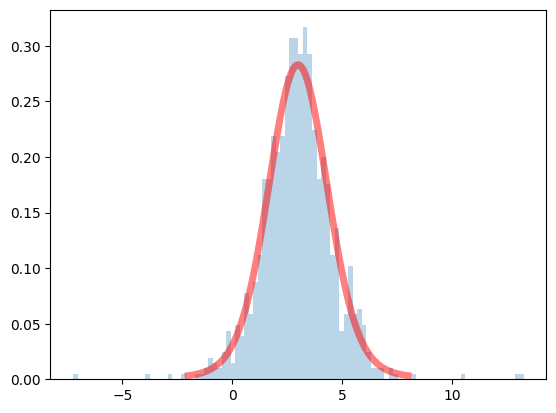

In [84]:
#init varaibles
miu = 3.0
Levy_exponent = 1.8
beta = 0

aux_domain = np.linspace(miu-5, miu+5, 100)

Levy_pdf = np.array([levy_stable.pdf(i, alpha=Levy_exponent, beta=beta, loc=miu) for i in aux_domain])
Levy_rvs = levy_stable.rvs(Levy_exponent, beta, loc=miu, size=1000)

plt.hist(Levy_rvs, bins=100, density=True, histtype='stepfilled', alpha=0.3, label='Levy walk histo')
plt.plot(aux_domain, Levy_pdf, 'r-', lw=5, alpha=0.5, label='Levy Walk PDF')

plt.show()

#**Actividad 3: Lévy flight - Vec2d - 1 Trayectoria (6 pts)**
 * Utilizar Vec2d.
 * Guardar trayectorias en pandas Data Frame.
 * Visualizar proyección en 3D con plotly.

In [168]:
#Init variables
Levy_exponent = 0.7
miu = 3.0
beta = 0
n_steps = 250
s_pos = [0,0]

Levy_rvs = levy_stable.rvs(Levy_exponent,beta, loc=miu, size=n_steps)

Wrapcauchy_rvs = wrapcauchy.rvs(c=Levy_exponent, loc=beta, size=n_steps)
cauchy_rvs = Wrapcauchy_rvs
for n in range(len(cauchy_rvs)):
  for m in range(n):
    cauchy_rvs[n] += cauchy_rvs[m]

Levy_rvs_abs = abs(Levy_rvs)

LF_2d_df = pd.DataFrame(columns=['x_pos', 'y_pos'])

temp_df = pd.DataFrame([{'x_pos':s_pos[0],'y_pos':s_pos[1]}])

LF_2d_df = pd.concat([LF_2d_df,temp_df], ignore_index=True)

for i in range(n_steps-1):
  #init velocity vector
  velocity = Vec2d(Levy_rvs_abs[i], 0)
  velocity = velocity.rotated(cauchy_rvs[i])

  temp_df = pd.DataFrame([{'x_pos':LF_2d_df.x_pos[i]+velocity.x,'y_pos':LF_2d_df.y_pos[i]+velocity.y}])
  LF_2d_df = pd.concat([LF_2d_df,temp_df], ignore_index=True)

In [169]:
fig_LF_2d = go.Figure()

fig_LF_2d.add_trace(go.Scatter3d(x= LF_2d_df.x_pos,
                              y= LF_2d_df.y_pos,
                              z=np.linspace(0,1,n_steps),
                              marker= dict(size=2),
                              line=dict(width=2),
                              mode='lines',
                              name='LF_3d',
                              showlegend=True))

fig_LF_2d.update_layout(title_text='Levy flight in 3D',
                        autosize=False,
                        width = 900,
                        height = 700)

fig_LF_2d.show()

#**Actividad 4: Correlated Random Walk - Vec2d - N Trayectorias (7 pts)**
 * Generar tantas trayectorias tipo CRW como se especifique en una variable de control
n_traj.
 * Cada una de las trayectorias debera tener un coeficiente de Cauchy diferente.
 * Utilizar Vec2d.
 * Guardar trayectorias en pandas Data Frame.
 * Visualizar proyección en 3D con plotly.
 * Exportar trayectorias a un archivo tipo pkl.

In [ ]:
#init variables
n_traj = 25
n_steps = 1000
s_pos = [0,0]
speed = 6

